##  1.  Generate full dataset with features

In [189]:
#import packages
from __future__ import division
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np
import seaborn as sns
import pickle as pkl


In [190]:
import sys
!{sys.executable} -m pip install iso3166
import iso3166

In [191]:
## Load the feature sets
URLdata = pd.read_csv('../data/FeatureData.csv')
URLdata = URLdata.drop(['Unnamed: 0'], axis = 1)
URLdata.head()

,url,no of dots,no of hyphen,len of url,no of at,no of double slash,no of subdir,no of subdomain,len of domain,no of queries,contains IP,presence of Suspicious_TLD,presence of suspicious domain,create_age(months),expiry_age(months),update_age(days),country,file extension,label
0,http://livelywebordainedkool.cf/harwoodservice...,0,0,66,0,0,3,0,24,0,0,0,0,-1,-1,-1,None,.php,1
1,amazon.com.br:80/gp/redirect.html?_encoding=UT...,0,0,207,0,0,2,0,16,173,0,0,0,-1,-1,-1,None,.html,0
2,usaerectionrx.com,0,0,17,0,0,0,0,17,0,0,0,0,9,3,249,UA,.com,0
3,http://ciespains.com/delivery/index.htm,0,0,32,0,0,2,0,13,0,0,0,0,1,11,0,None,.htm,1
4,http://paypalsecureresetloginpage.elifelfmarle...,0,0,64,0,0,1,1,44,0,0,0,0,30,6,905,TR,NaN,1


In [192]:
URLdata.shape

(47274, 19)

## Check the Class Balance in the final dataset

In [193]:
#print total number of urls in the dataset
print('There are ' + str(len(URLdata)) + ' urls in the dataset.')
#percentage of malicious url
spam = len(URLdata[URLdata['label']==1])
percent_spam = spam/len(URLdata)*100
print(str(round(percent_spam,2)) + '% of urls are malicious urls.')

There are 47274 urls in the dataset.
49.6% of urls are malicious urls.


In [194]:
#check the existence of NA values 
URLdata.isnull().any()

url                              False
no of dots                       False
no of hyphen                     False
len of url                       False
no of at                         False
no of double slash               False
no of subdir                     False
no of subdomain                  False
len of domain                    False
no of queries                    False
contains IP                      False
presence of Suspicious_TLD       False
presence of suspicious domain    False
create_age(months)               False
expiry_age(months)               False
update_age(days)                 False
country                           True
file extension                    True
label                            False
dtype: bool

In [195]:
# Data Imputation by filling NA to the country and file extension column
URLdata['country']=URLdata['country'].fillna('None')
URLdata['file extension']=URLdata['file extension'].fillna('None')

In [196]:
URLdata.describe()

,no of dots,no of hyphen,len of url,no of at,no of double slash,no of subdir,no of subdomain,len of domain,no of queries,contains IP,presence of Suspicious_TLD,presence of suspicious domain,create_age(months),expiry_age(months),update_age(days),label
count,47274.000000,47274.000000,47274.000000,47274.000000,47274.000000,47274.000000,47274.000000,47274.000000,47274.000000,47274.000000,47274.000000,47274.0,47274.000000,47274.000000,47274.000000,47274.000000
mean,0.041376,0.072788,45.205800,0.000085,0.001650,1.971507,0.180564,15.155265,8.655392,0.012586,0.004315,0.0,107.140733,13.179951,241.289715,0.495981
std,0.402830,0.375754,52.427959,0.011266,0.040587,2.076390,0.594411,7.772646,39.664530,0.111481,0.065550,0.0,255.237162,26.362365,447.198204,0.499989
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.0,-37020.000000,-104.000000,-203.000000,0.000000
25%,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,10.250000,0.000000,0.000000,0.000000,0.0,-1.000000,-1.000000,-1.000000,0.000000
50%,0.000000,0.000000,31.000000,0.000000,0.000000,2.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.0,79.000000,6.000000,84.000000,0.000000
75%,0.000000,0.000000,55.000000,0.000000,0.000000,3.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.0,205.000000,13.000000,293.000000,1.000000
max,14.000000,11.000000,2307.000000,2.000000,1.000000,93.000000,15.000000,249.000000,2245.000000,1.000000,1.000000,0.0,24220.000000,1102.000000,7989.000000,1.000000


* Based on the descriptive statistics of URL data, none of the URLs in the dataset contains suspicious domain. So this feature can be dropped.

* The new URL dataset which has presence of suspicious domain column dropped is called URLdata_1.

In [197]:
URLdata_1 = URLdata.drop(['presence of suspicious domain'], axis=1)
print(list(URLdata_1))

['url', 'no of dots', 'no of hyphen', 'len of url', 'no of at', 'no of double slash', 'no of subdir', 'no of subdomain', 'len of domain', 'no of queries', 'contains IP', 'presence of Suspicious_TLD', 'create_age(months)', 'expiry_age(months)', 'update_age(days)', 'country', 'file extension', 'label']


In [198]:
# from the output, there exist invalid country codes
URLdata_1['country'].unique()

array(['None', 'UA', 'TR', 'US', 'SG', 'DE', 'GB', 'MX', 'FR',
       'REDACTED FOR PRIVACY', 'JP', 'BD', 'MY', 'CM', 'ar', 'ID',
       'Statutory Masking Enabled', 'CN', 'Abuse Contact:', 'KR',
       'GDPR Masked', 'LI', 'HK', 'us', 'CY', 'NG', 'SE', 'IN', 'PA',
       'Data protected under GDPR, not disclosed', 'cert@surfnet.nl',
       'th', 'GI', 'CA', 'NL', 'GR', 'CZ', 'RU', 'ES', 'KE', 'Austria',
       'QA', 'BR', 'AE', 'CL', 'AU', 'GH', 'Cyprus', 'abuse@registrar.eu',
       'IL', 'PK', 'CO', 'DATA REDACTED', 'cn', 'BS', 'fr', 'IT', 'AR',
       'UK', 'CH', 'LT', 'VN', 'LB', 'PE', 'BE', 'LU', 'TH', 'AM', 'PT',
       'abuse@mijninternetoplossing.nl', 'SI', 'HT', 'RO', 'DK', 'Canada',
       'SK', 'uganda', 'ZA', 'VE', 'EG', 'EC', 'TW', 'PH', 'Malaysia',
       'OM', 'IE', 'CW', 'PL', 'AT', 'LR', 'VG', 'Hungary', 'KY', 'DO',
       'GE', 'RS', 'SA', 'Redacted for Privacy Purposes',
       'abuse@www.ns0.nl', 'NO', 'SO', 'DM', 'BM', 'CI', 'United States',
       'MD', 'SC', 'KW

 From the output, there exist invalid country codes.
 
 * 1. Non-country strings: abuse@hostingxs.nl, Phone: +1.2125923078, GDPR Masked, etc
 
 * 2. Full country name: Canada, Bangladesh, china
 
 * 3. Mixture of upper and lower characters

In [199]:
# clean country code
country = URLdata_1.country
new_country = []
for i in range(len(country)):
    c = str(country[i])
    if c.upper() in iso3166.countries_by_name:
        new_country.append(iso3166.countries_by_name[c.upper()][1])
    elif len(c) == 2 and not c.isupper():
        new_country.append(c.upper())
    elif len(c) != 2 and c != 'REDACTED FOR PRIVACY':
        new_country.append('None')
    else:
        new_country.append(c)

In [200]:
URLdata_1['country'] = new_country
URLdata_1['country'].unique()

array(['None', 'UA', 'TR', 'US', 'SG', 'DE', 'GB', 'MX', 'FR',
       'REDACTED FOR PRIVACY', 'JP', 'BD', 'MY', 'CM', 'AR', 'ID', 'CN',
       'KR', 'LI', 'HK', 'CY', 'NG', 'SE', 'IN', 'PA', 'TH', 'GI', 'CA',
       'NL', 'GR', 'CZ', 'RU', 'ES', 'KE', 'AT', 'QA', 'BR', 'AE', 'CL',
       'AU', 'GH', 'IL', 'PK', 'CO', 'BS', 'IT', 'UK', 'CH', 'LT', 'VN',
       'LB', 'PE', 'BE', 'LU', 'AM', 'PT', 'SI', 'HT', 'RO', 'DK', 'SK',
       'UG', 'ZA', 'VE', 'EG', 'EC', 'TW', 'PH', 'OM', 'IE', 'CW', 'PL',
       'LR', 'VG', 'HU', 'KY', 'DO', 'GE', 'RS', 'SA', 'NO', 'SO', 'DM',
       'BM', 'CI', 'MD', 'SC', 'KW', 'BZ', 'BA', 'BG', 'LK', 'MA', 'JO',
       'DZ', 'TN', 'NP', 'MV', 'MN', 'BJ', 'YE', 'MT', 'SN', 'UY', 'FI',
       'LY', 'IR', 'KH', 'KN', 'NZ', 'RW', 'HR', 'ZW', 'AF', 'BY', 'GT',
       'CR', 'LV', 'MR', 'TT', 'IS', 'BO', 'AZ', 'GP', 'KZ', 'MK', 'AL',
       'BB', 'TZ', 'HN', 'IQ', 'BN', 'PR', 'JE', 'GY', 'EE', 'PY', 'MM',
       'ET', 'BH', 'MC', 'IM', 'JM', 'UN'], dtype=object)

## Exploratory Data Analysis
### 1.  Visualizations
* Create visualizations on distributions of each feature obtained of both malicious and secure urls. 
  Enable users to see the significance of each feature on classifying malicious urls based on the aggregated url    database.
* One way to visualize the feature importance

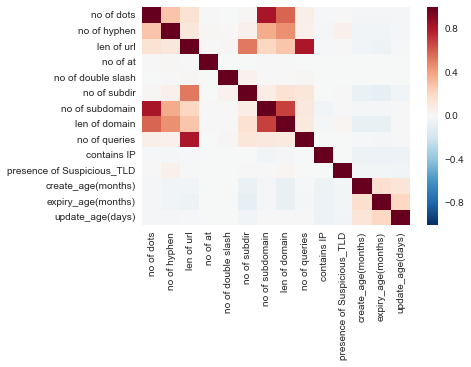

In [201]:
corr = URLdata_1[['no of dots', 'no of hyphen', 'len of url', 'no of at',
       'no of double slash', 'no of subdir', 'no of subdomain',
       'len of domain', 'no of queries', 'contains IP',
       'presence of Suspicious_TLD', 'create_age(months)',
       'expiry_age(months)', 'update_age(days)']].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### 1 - 1.  URL Length Distribution of both Good and Malicious URLs
* plot an estimated probability density function

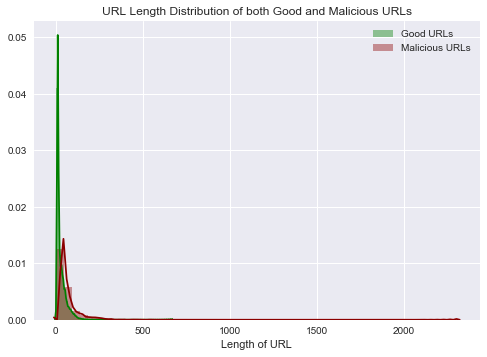

In [202]:
sns.set(style="darkgrid")
sns.distplot(URLdata_1[URLdata_1['label']==0]['len of url'],color='green',label='Good URLs')
sns.distplot(URLdata_1[URLdata_1['label']==1]['len of url'],color='darkred',label='Malicious URLs')
sns.plt.title('URL Length Distribution of both Good and Malicious URLs')
plt.legend(loc='upper right')
plt.xlabel('Length of URL')

sns.plt.show()

### 1 - 2.  Distribution of Number of Dots appearred of both Good and Malicious URLs

In [203]:
total_count = URLdata_1['no of dots'].value_counts()
bad_count = URLdata_1[URLdata_1['label'] == 1]['no of dots'].value_counts()
good_count = URLdata_1[URLdata_1['label'] == 0]['no of dots'].value_counts()
no_of_dots = {'Total Count': total_count, 'Good Count': good_count, 'Bad Count': bad_count}
no_of_dots = pd.DataFrame(no_of_dots)
no_of_dots.fillna(0)

,Total Count,Good Count,Bad Count
0,46226,23802.0,22424
1,686,21.0,665
2,204,4.0,200
3,55,0.0,55
4,39,0.0,39
5,13,0.0,13
6,8,0.0,8
7,15,0.0,15
8,1,0.0,1
9,3,0.0,3


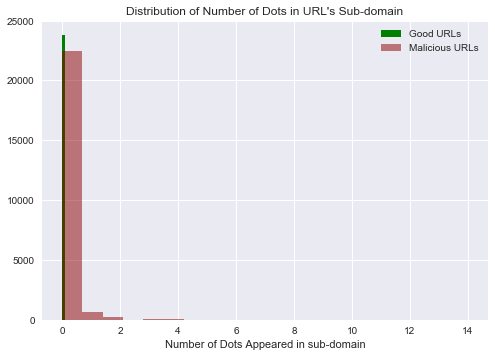

In [205]:
x=URLdata_1[URLdata_1['label']==0]['no of dots']
y=URLdata_1[URLdata_1['label']==1]['no of dots']
plt.hist(x,bins=20, alpha=1, label='Good URLs',color='green')
plt.hist(y,bins=20, alpha=0.5, label='Malicious URLs',color='darkred')
plt.legend(loc='upper right')
plt.xlabel('Number of Dots Appeared in sub-domain')
plt.title("Distribution of Number of Dots in URL's Sub-domain")
plt.show()

### If we only look at 'number of dots' >= 1

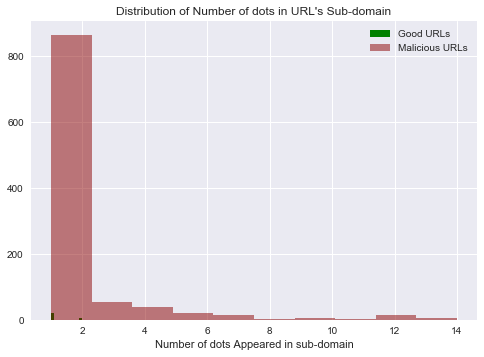

In [206]:
x=URLdata_1[URLdata_1['label']==0][URLdata_1[URLdata_1['label']==0]['no of dots'] >=1]['no of dots']
y=URLdata_1[URLdata_1['label']==1][URLdata_1[URLdata_1['label']==1]['no of dots'] >=1]['no of dots']
plt.hist(x,bins=10, alpha=1, label='Good URLs',color='green')
plt.hist(y,bins=10, alpha=0.5, label='Malicious URLs',color='darkred')
plt.legend(loc='upper right')
plt.xlabel('Number of dots Appeared in sub-domain')
plt.title("Distribution of Number of dots in URL's Sub-domain")
plt.show()

### 1 - 3.  Distribution of Number of hyphens appearred of both Good and Malicious URLs

In [207]:
total_count = URLdata_1['no of hyphen'].value_counts()
bad_count = URLdata_1[URLdata_1['label'] == 1]['no of hyphen'].value_counts()
good_count = URLdata_1[URLdata_1['label'] == 0]['no of hyphen'].value_counts()
no_of_hyphens = {'Total Count': total_count, 'Good Count': good_count, 'Bad Count': bad_count}
no_of_hyphens = pd.DataFrame(no_of_hyphens)
no_of_hyphens.fillna(0)

,Total Count,Good Count,Bad Count
0,44777,23827.0,20950
1,1909,0.0,1909
2,413,0.0,413
3,83,0.0,83
4,62,0.0,62
5,12,0.0,12
6,7,0.0,7
7,3,0.0,3
10,2,0.0,2
11,6,0.0,6


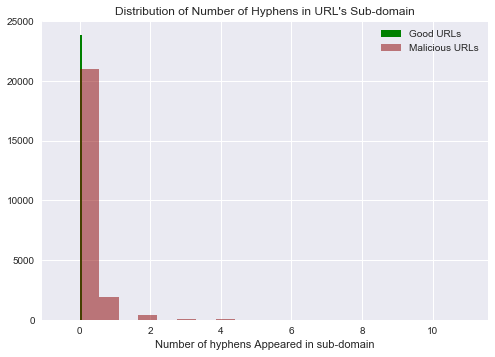

In [208]:
x=URLdata_1[URLdata_1['label']==0]['no of hyphen']
y=URLdata_1[URLdata_1['label']==1]['no of hyphen']
plt.hist(x,bins=20, alpha=1, label='Good URLs',color='green')
plt.hist(y,bins=20, alpha=0.5, label='Malicious URLs',color='darkred')
plt.legend(loc='upper right')
plt.xlabel('Number of hyphens Appeared in sub-domain')
plt.title("Distribution of Number of Hyphens in URL's Sub-domain")
plt.show()

### If we only look at 'number of -' >= 1

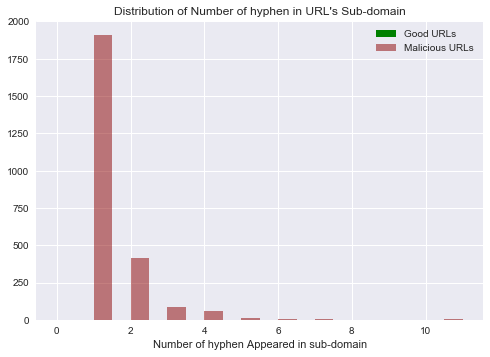

In [209]:
x=URLdata_1[URLdata_1['label']==0][URLdata_1[URLdata_1['label']==0]['no of hyphen'] >=1]['no of hyphen']
y=URLdata_1[URLdata_1['label']==1][URLdata_1[URLdata_1['label']==1]['no of hyphen'] >=1]['no of hyphen']
plt.hist(x,bins=20, alpha=1, label='Good URLs',color='green')
plt.hist(y,bins=20, alpha=0.5, label='Malicious URLs',color='darkred')
plt.legend(loc='upper right')
plt.xlabel('Number of hyphen Appeared in sub-domain')
plt.title("Distribution of Number of hyphen in URL's Sub-domain")
plt.show()

### 1 - 4.  Distribution of Number of @ appearred of both Good and Malicious URLs

In [210]:
total_count = URLdata_1['no of at'].value_counts()
bad_count = URLdata_1[URLdata_1['label'] == 1]['no of at'].value_counts()
good_count = URLdata_1[URLdata_1['label'] == 0]['no of at'].value_counts()
no_of_at = {'Total Count': total_count, 'Good Count': good_count, 'Bad Count': bad_count}
no_of_at = pd.DataFrame(no_of_at)
no_of_at.fillna(0)

,Total Count,Good Count,Bad Count
0,47271,23827.0,23444
1,2,0.0,2
2,1,0.0,1


### 1 - 5.  Distribution of Number of // appearred of both Good and Malicious URLs

In [211]:
total_count = URLdata_1['no of double slash'].value_counts()
bad_count = URLdata_1[URLdata_1['label'] == 1]['no of double slash'].value_counts()
good_count = URLdata_1[URLdata_1['label'] == 0]['no of double slash'].value_counts()
no_of_ds = {'Total Count': total_count, 'Good Count': good_count, 'Bad Count': bad_count}
no_of_ds = pd.DataFrame(no_of_ds)
no_of_ds.fillna(0)

,Total Count,Good Count,Bad Count
0,47196,23813,23383
1,78,14,64


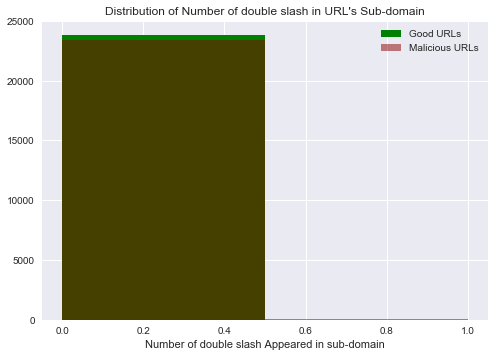

In [212]:
x=URLdata_1[URLdata_1['label']==0]['no of double slash']
y=URLdata_1[URLdata_1['label']==1]['no of double slash']
plt.hist(x,bins=2, alpha=1, label='Good URLs',color='green')
plt.hist(y,bins=2, alpha=0.5, label='Malicious URLs',color='darkred')
plt.legend(loc='upper right')
plt.xlabel('Number of double slash Appeared in sub-domain')
plt.title("Distribution of Number of double slash in URL's Sub-domain")
plt.show()

### If we only look at 'number of //' >= 1:

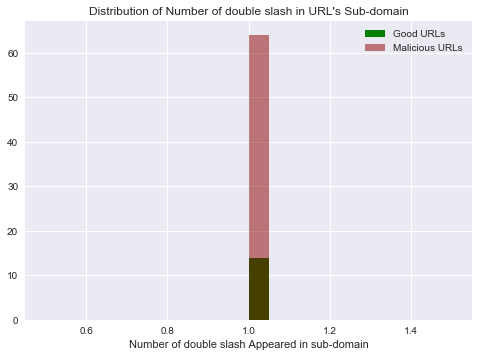

In [213]:
x=URLdata_1[URLdata_1['label']==0][URLdata_1[URLdata_1['label']==0]['no of double slash'] >=1]['no of double slash']
y=URLdata_1[URLdata_1['label']==1][URLdata_1[URLdata_1['label']==1]['no of double slash'] >=1]['no of double slash']
plt.hist(x,bins=20, alpha=1, label='Good URLs',color='green')
plt.hist(y,bins=20, alpha=0.5, label='Malicious URLs',color='darkred')
plt.legend(loc='upper right')
plt.xlabel('Number of double slash Appeared in sub-domain')
plt.title("Distribution of Number of double slash in URL's Sub-domain")
plt.show()

### 1 - 6.  Distribution of Number of subdir of both Good and Malicious URLs

In [214]:
total_count = URLdata_1['no of subdir'].value_counts()
bad_count = URLdata_1[URLdata_1['label'] == 1]['no of subdir'].value_counts()
good_count = URLdata_1[URLdata_1['label'] == 0]['no of subdir'].value_counts()
no_of_subdir = {'Total Count': total_count, 'Good Count': good_count, 'Bad Count': bad_count}
no_of_subdir = pd.DataFrame(no_of_subdir)
no_of_subdir.fillna(0)

,Total Count,Good Count,Bad Count
0,14945,14062.0,883.0
1,7629,1234.0,6395.0
2,8983,4225.0,4758.0
3,6720,2342.0,4378.0
4,3885,1124.0,2761.0
5,2431,508.0,1923.0
6,1127,187.0,940.0
7,625,56.0,569.0
8,370,38.0,332.0
9,307,22.0,285.0


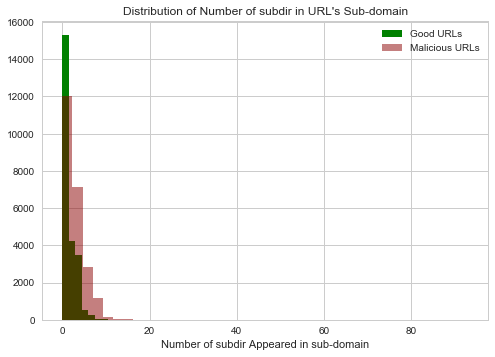

In [255]:
x=URLdata_1[URLdata_1['label']==0]['no of subdir']
y=URLdata_1[URLdata_1['label']==1]['no of subdir']
plt.hist(x,bins=10, alpha=1, label='Good URLs',color='green')
plt.hist(y,bins=40, alpha=0.5, label='Malicious URLs',color='darkred')
plt.legend(loc='upper right')
plt.xlabel('Number of subdir Appeared in sub-domain')
plt.title("Distribution of Number of subdir in URL's Sub-domain")
plt.show()

### 1 - 7.  Distribution of Number of sub-domain of both Good and Malicious URLs

In [216]:
total_count = URLdata_1['no of subdomain'].value_counts()
bad_count = URLdata_1[URLdata_1['label'] == 1]['no of subdomain'].value_counts()
good_count = URLdata_1[URLdata_1['label'] == 0]['no of subdomain'].value_counts()
no_of_subdomain = {'Total Count': total_count, 'Good Count': good_count, 'Bad Count': bad_count}
no_of_subdomain = pd.DataFrame(no_of_subdomain)
no_of_subdomain.fillna(0)

,Total Count,Good Count,Bad Count
0,40694,23607.0,17087
1,5532,195.0,5337
2,686,21.0,665
3,204,4.0,200
4,55,0.0,55
5,39,0.0,39
6,13,0.0,13
7,8,0.0,8
8,15,0.0,15
9,1,0.0,1


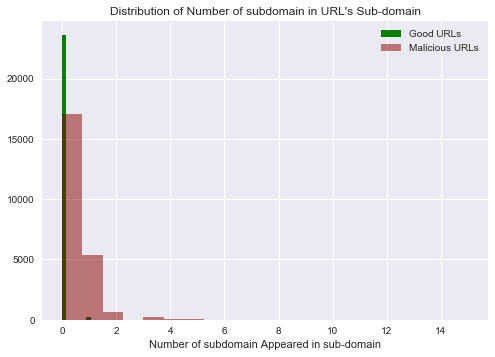

In [217]:
x=URLdata_1[URLdata_1['label']==0]['no of subdomain']
y=URLdata_1[URLdata_1['label']==1]['no of subdomain']
plt.hist(x,bins=20, alpha=1, label='Good URLs',color='green')
plt.hist(y,bins=20, alpha=0.5, label='Malicious URLs',color='darkred')
plt.legend(loc='upper right')
plt.xlabel('Number of subdomain Appeared in sub-domain')
plt.title("Distribution of Number of subdomain in URL's Sub-domain")
plt.show()

### If we only look at "Number of subdomain" >= 2

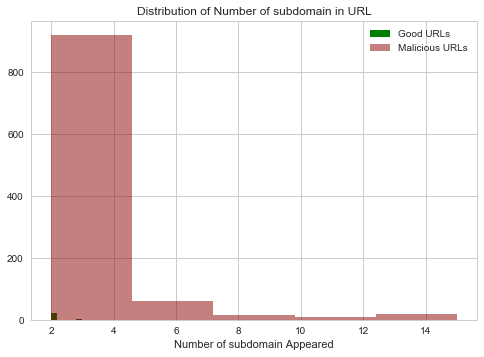

In [274]:
x=URLdata_1[URLdata_1['label']==0][URLdata_1[URLdata_1['label']==0]['no of subdomain'] >=2]['no of subdomain']
y=URLdata_1[URLdata_1['label']==1][URLdata_1[URLdata_1['label']==1]['no of subdomain'] >=2]['no of subdomain']
plt.hist(x,bins=5, alpha=1, label='Good URLs',color='green')
plt.hist(y,bins=5, alpha=0.5, label='Malicious URLs',color='darkred')
plt.legend(loc='upper right')
plt.xlabel('Number of subdomain Appeared')
plt.title("Distribution of Number of subdomain in URL")
plt.show()

### 1 - 8.  Distribution of Length of Domain of both Good and Malicious URLs

In [275]:
total_count = URLdata_1['len of domain'].value_counts()
bad_count = URLdata_1[URLdata_1['label'] == 1]['len of domain'].value_counts()
good_count = URLdata_1[URLdata_1['label'] == 0]['len of domain'].value_counts()
no_of_subdomain = {'Total Count': total_count, 'Good Count': good_count, 'Bad Count': bad_count}
no_of_subdomain = pd.DataFrame(no_of_subdomain)
no_of_subdomain.fillna(0)

,Total Count,Good Count,Bad Count
3,10,3.0,7
4,130,23.0,107
5,364,291.0,73
6,1155,897.0,258
7,1891,1450.0,441
8,2088,1796.0,292
9,2730,2173.0,557
10,3450,2542.0,908
11,3775,2537.0,1238
12,3667,2336.0,1331


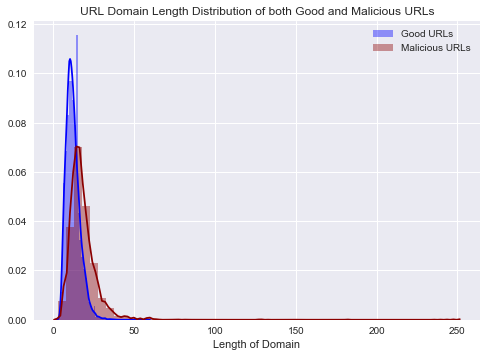

In [221]:
sns.set(style="darkgrid")
sns.distplot(URLdata_1[URLdata_1['label']==0]['len of domain'],color='blue', label='Good URLs')
sns.distplot(URLdata_1[URLdata_1['label']==1]['len of domain'],color='darkred',label='Malicious URLs')
sns.plt.title('URL Domain Length Distribution of both Good and Malicious URLs')
plt.legend(loc='upper right')
plt.xlabel('Length of Domain')

sns.plt.show()

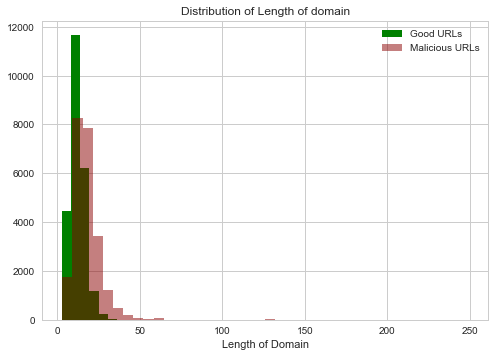

In [276]:
x=URLdata_1[URLdata_1['label']==0]['len of domain']
y=URLdata_1[URLdata_1['label']==1]['len of domain']
plt.hist(x,bins=10, alpha=1, label='Good URLs',color='green')
plt.hist(y,bins=40, alpha=0.5, label='Malicious URLs',color='darkred')
plt.legend(loc='upper right')
plt.xlabel('Length of Domain')
plt.title("Distribution of Length of domain")
plt.show()

### 1 - 9.  Distribution of Number of queries of both Good and Malicious URLs

In [228]:
total_count = URLdata_1['no of queries'].value_counts()
bad_count = URLdata_1[URLdata_1['label'] == 1]['no of queries'].value_counts()
good_count = URLdata_1[URLdata_1['label'] == 0]['no of queries'].value_counts()
no_of_queries = {'Total Count': total_count, 'Good Count': good_count, 'Bad Count': bad_count}
no_of_queries = pd.DataFrame(no_of_queries)
no_of_queries.fillna(0)

,Total Count,Good Count,Bad Count
0,41399,22638.0,18761.0
1,15,0.0,15.0
2,19,1.0,18.0
3,96,4.0,92.0
4,43,15.0,28.0
5,74,17.0,57.0
6,84,24.0,60.0
7,155,49.0,106.0
8,162,67.0,95.0
9,113,33.0,80.0


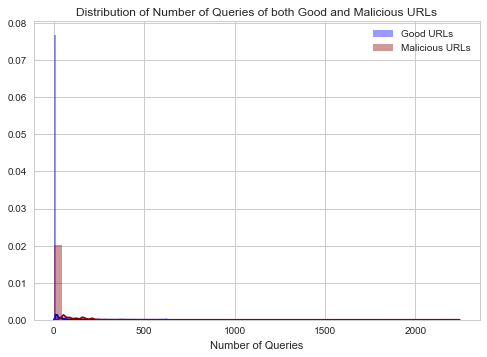

In [229]:
sns.set(style="whitegrid")
sns.distplot(URLdata_1[URLdata_1['label']==0]['no of queries'],color='blue', label='Good URLs')
sns.distplot(URLdata_1[URLdata_1['label']==1]['no of queries'],color='darkred',label='Malicious URLs')
sns.plt.title('Distribution of Number of Queries of both Good and Malicious URLs')
plt.legend(loc='upper right')
plt.xlabel('Number of Queries')

sns.plt.show()

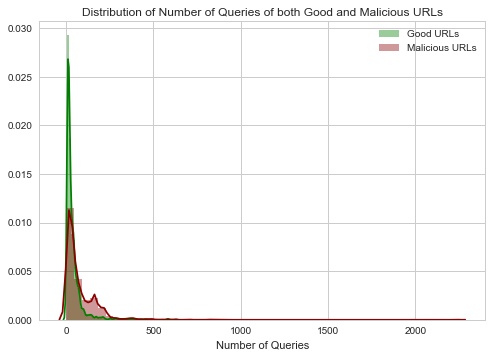

In [230]:
sns.set(style="whitegrid")
sns.distplot(URLdata_1[URLdata_1['label']==0][URLdata_1[URLdata_1['label']==0]['no of queries'] >=1]['no of queries'],color='green', label='Good URLs')
sns.distplot(URLdata_1[URLdata_1['label']==1][URLdata_1[URLdata_1['label']==1]['no of queries'] >=1]['no of queries'],color='darkred',label='Malicious URLs')
sns.plt.title('Distribution of Number of Queries of both Good and Malicious URLs')
plt.legend(loc='upper right')
plt.xlabel('Number of Queries')

sns.plt.show()

### 1 - 10.  Distribution of 'Contains IP' of both Good and Malicious URLs

In [231]:
total_count = URLdata_1['contains IP'].value_counts()
bad_count = URLdata_1[URLdata_1['label'] == 1]['contains IP'].value_counts()
good_count = URLdata_1[URLdata_1['label'] == 0]['contains IP'].value_counts()
containsIP = {'Total Count': total_count, 'Good Count': good_count, 'Bad Count': bad_count}
containsIP = pd.DataFrame(containsIP)
containsIP.fillna(0)

,Total Count,Good Count,Bad Count
0,46679,23826,22853
1,595,1,594


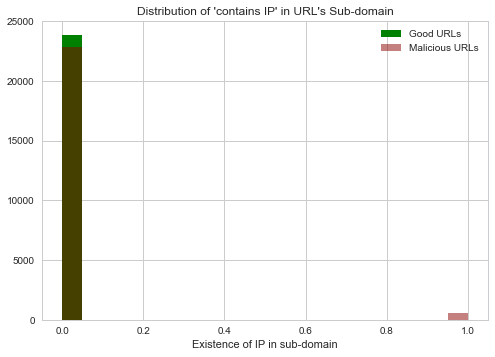

In [232]:
x=URLdata_1[URLdata_1['label']==0]['contains IP']
y=URLdata_1[URLdata_1['label']==1]['contains IP']
plt.hist(x,bins=20, alpha=1, label='Good URLs',color='green')
plt.hist(y,bins=20, alpha=0.5, label='Malicious URLs',color='darkred')
plt.legend(loc='upper right')
plt.xlabel('Existence of IP in sub-domain')
plt.title("Distribution of 'contains IP' in URL's Sub-domain")
plt.show()

### 1 - 11.  Distribution of 'presence of Suspicious_TLD' of both Good and Malicious URLs

In [233]:
total_count = URLdata_1['presence of Suspicious_TLD'].value_counts()
bad_count = URLdata_1[URLdata_1['label'] == 1]['presence of Suspicious_TLD'].value_counts()
good_count = URLdata_1[URLdata_1['label'] == 0]['presence of Suspicious_TLD'].value_counts()
susp = {'Total Count': total_count, 'Good Count': good_count, 'Bad Count': bad_count}
susp = pd.DataFrame(susp)
susp.fillna(0)

,Total Count,Good Count,Bad Count
0,47070,23826,23244
1,204,1,203


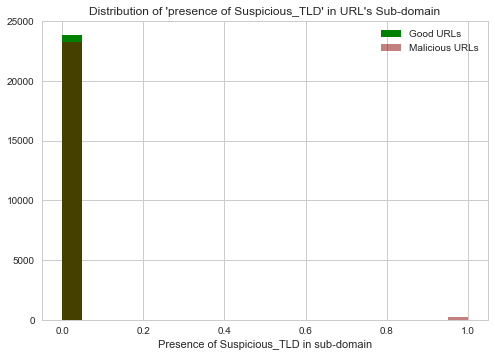

In [234]:
x=URLdata_1[URLdata_1['label']==0]['presence of Suspicious_TLD']
y=URLdata_1[URLdata_1['label']==1]['presence of Suspicious_TLD']
plt.hist(x,bins=20, alpha=1, label='Good URLs',color='green')
plt.hist(y,bins=20, alpha=0.5, label='Malicious URLs',color='darkred')
plt.legend(loc='upper right')
plt.xlabel('Presence of Suspicious_TLD in sub-domain')
plt.title("Distribution of 'presence of Suspicious_TLD' in URL's Sub-domain")
plt.show()

### 1-12 Create_Age(months)

In [256]:
total_count = URLdata_1['create_age(months)'].value_counts()
bad_count = URLdata_1[URLdata_1['label'] == 1]['create_age(months)'].value_counts()
good_count = URLdata_1[URLdata_1['label'] == 0]['create_age(months)'].value_counts()
containsIP = {'Total Count': total_count, 'Good Count': good_count, 'Bad Count': bad_count}
containsIP = pd.DataFrame(containsIP)
containsIP.fillna(0)

,Total Count,Good Count,Bad Count
-1,14292,5885,8407.0
0,335,11,324.0
1,337,16,321.0
2,295,15,280.0
3,150,22,128.0
4,130,14,116.0
5,229,29,200.0
6,199,68,131.0
7,345,163,182.0
8,190,51,139.0


In [268]:
URLdata_1 = URLdata_1.drop(URLdata_1[URLdata_1['create_age(months)'] == -37020].index)
URLdata_1 = URLdata_1.drop(URLdata_1[URLdata_1['create_age(months)'] == 24220].index)

In [269]:
URLdata_1 = URLdata_1.reset_index(drop = True)

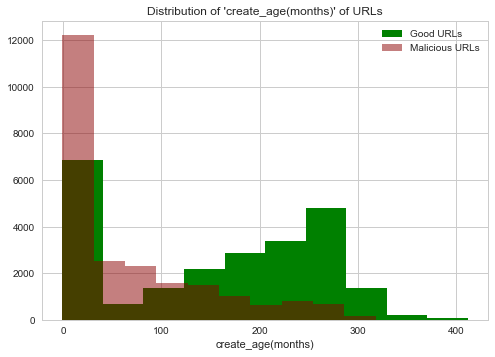

In [277]:
## create age
x=URLdata_1[URLdata_1['label']==0]['create_age(months)']
y=URLdata_1[URLdata_1['label']==1]['create_age(months)']
plt.hist(x,bins=10, alpha=1, label='Good URLs',color='green')
plt.hist(y,bins=10, alpha=0.5, label='Malicious URLs',color='darkred')
plt.legend(loc='upper right')
plt.xlabel('create_age(months)')
plt.title("Distribution of 'create_age(months)' of URLs")
plt.show()

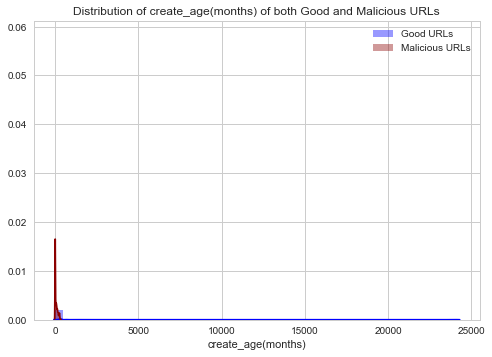

In [267]:
sns.set(style="whitegrid")
sns.distplot(URLdata_1[URLdata_1['label']==0]['create_age(months)'],color='blue', label='Good URLs')
sns.distplot(URLdata_1[URLdata_1['label']==1]['create_age(months)'],color='darkred',label='Malicious URLs')
sns.plt.title('Distribution of create_age(months) of both Good and Malicious URLs')
plt.legend(loc='upper right')
plt.xlabel('create_age(months)')

sns.plt.show()

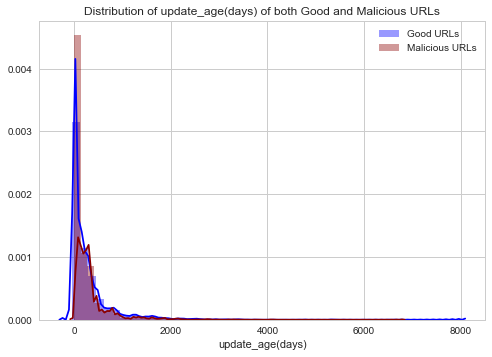

In [240]:
## update_age(days)
sns.set(style="whitegrid")
sns.distplot(URLdata_1[URLdata_1['label']==0]['update_age(days)'],color='blue', label='Good URLs')
sns.distplot(URLdata_1[URLdata_1['label']==1]['update_age(days)'],color='darkred',label='Malicious URLs')
sns.plt.title('Distribution of update_age(days) of both Good and Malicious URLs')
plt.legend(loc='upper right')
plt.xlabel('update_age(days)')

sns.plt.show()

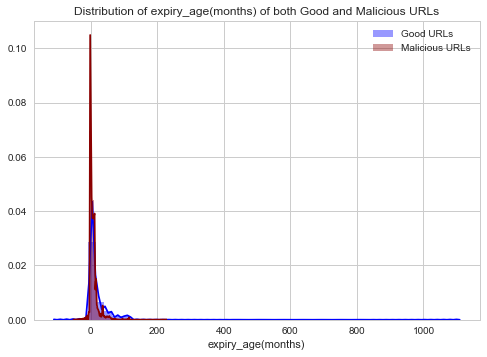

In [241]:
# expiry_age(months)
sns.set(style="whitegrid")
sns.distplot(URLdata_1[URLdata_1['label']==0]['expiry_age(months)'],color='blue', label='Good URLs')
sns.distplot(URLdata_1[URLdata_1['label']==1]['expiry_age(months)'],color='darkred',label='Malicious URLs')
sns.plt.title('Distribution of expiry_age(months) of both Good and Malicious URLs')
plt.legend(loc='upper right')
plt.xlabel('expiry_age(months)')

sns.plt.show()

In [242]:
## correct the right skewness of length of URL
URLdata_1['len of url'] = np.log(URLdata_1['len of url'])

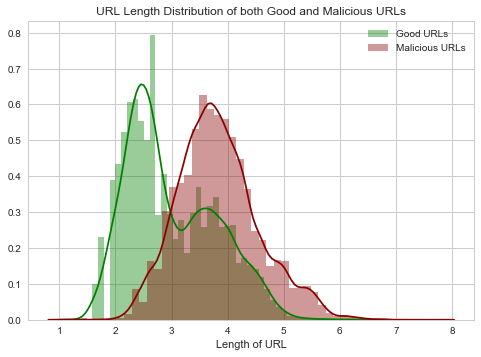

In [243]:
## check the distribution of length of URL after log transformation
sns.set(style="whitegrid")
sns.distplot(URLdata_1[URLdata_1['label']==0]['len of url'],color='green',label='Good URLs')
sns.distplot(URLdata_1[URLdata_1['label']==1]['len of url'],color='darkred',label='Malicious URLs')
sns.plt.title('URL Length Distribution of both Good and Malicious URLs')
plt.legend(loc='upper right')
plt.xlabel('Length of URL')

sns.plt.show()

In [244]:
## Create a new feature called Risk Indicator
c1 = URLdata_1['no of dots'] >= 1
c2 = URLdata_1['no of hyphen'] >= 1
c3 = URLdata_1['no of subdir'] >= 6
c4 = URLdata_1['contains IP'] == 1
c5 = URLdata_1['presence of Suspicious_TLD'] == 1

URLdata_1['risk indicator'] = np.array([c1 | c2| c3| c4| c5]).astype(int).T

In [245]:
URLdata_1.head(10)

,url,no of dots,no of hyphen,len of url,no of at,no of double slash,no of subdir,no of subdomain,len of domain,no of queries,contains IP,presence of Suspicious_TLD,create_age(months),expiry_age(months),update_age(days),country,file extension,label,risk indicator
0,http://livelywebordainedkool.cf/harwoodservice...,0,0,4.189655,0,0,3,0,24,0,0,0,-1,-1,-1,None,.php,1,0
1,amazon.com.br:80/gp/redirect.html?_encoding=UT...,0,0,5.332719,0,0,2,0,16,173,0,0,-1,-1,-1,None,.html,0,0
2,usaerectionrx.com,0,0,2.833213,0,0,0,0,17,0,0,0,9,3,249,UA,.com,0,0
3,http://ciespains.com/delivery/index.htm,0,0,3.465736,0,0,2,0,13,0,0,0,1,11,0,None,.htm,1,0
4,http://paypalsecureresetloginpage.elifelfmarle...,0,0,4.158883,0,0,1,1,44,0,0,0,30,6,905,TR,None,1,0
5,msci.com,0,0,2.079442,0,0,0,0,8,0,0,0,300,0,358,US,.com,0,0
6,cecilmarine.com,0,0,2.708050,0,0,0,0,15,0,0,0,214,2,361,US,.com,0,0
7,mapharma61.fr/downloader/Maged/Model/Config/ss...,0,0,4.997212,0,0,12,0,13,0,0,0,91,9,417,None,.html,1,1
8,http://agencepub.co.rw/Paypal/Account-Limited/...,0,0,4.615121,0,0,8,0,15,0,0,0,-1,-1,-1,None,None,1,1
9,http://alohacomcentre.com/css/,0,0,3.135494,0,0,2,0,18,0,0,0,61,-1,23,SG,None,1,0


## Final check of the feature set before passing it to the modeling step

In [246]:
# Data Balance

#print total number of urls in the dataset
print('There are ' + str(len(URLdata_1)) + ' urls in the dataset.')
#percentage of malicious url
spam = len(URLdata_1[URLdata_1['label']==1])
percent_spam = spam/len(URLdata_1)*100
print(str(round(percent_spam,2)) + '% of urls are malicious urls.')

There are 47273 urls in the dataset.
49.6% of urls are malicious urls.


In [247]:
URLdata_1.describe()

,no of dots,no of hyphen,len of url,no of at,no of double slash,no of subdir,no of subdomain,len of domain,no of queries,contains IP,presence of Suspicious_TLD,create_age(months),expiry_age(months),update_age(days),label,risk indicator
count,47273.000000,47273.000000,47273.000000,47273.000000,47273.000000,47273.000000,47273.000000,47273.000000,47273.000000,47273.000000,47273.000000,47273.000000,47273.000000,47273.000000,47273.000000,47273.000000
mean,0.041377,0.072790,3.411010,0.000085,0.001650,1.971464,0.180568,15.155395,8.655131,0.012586,0.004315,107.926110,13.179976,241.284179,0.495991,0.132676
std,0.402834,0.375758,0.871555,0.011266,0.040587,2.076391,0.594417,7.772677,39.664909,0.111482,0.065550,189.703295,26.362644,447.201314,0.499989,0.339228
min,0.000000,0.000000,1.098612,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,-1.000000,-104.000000,-203.000000,0.000000,0.000000
25%,0.000000,0.000000,2.708050,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000
50%,0.000000,0.000000,3.433987,0.000000,0.000000,2.000000,0.000000,14.000000,0.000000,0.000000,0.000000,79.000000,6.000000,84.000000,0.000000,0.000000
75%,0.000000,0.000000,4.007333,0.000000,0.000000,3.000000,0.000000,18.000000,0.000000,0.000000,0.000000,205.000000,13.000000,293.000000,1.000000,0.000000
max,14.000000,11.000000,7.743703,2.000000,1.000000,93.000000,15.000000,249.000000,2245.000000,1.000000,1.000000,24220.000000,1102.000000,7989.000000,1.000000,1.000000


In [248]:
URLdata_1.to_csv('../data/Complete_Feature_Set.csv')